In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale

In [3]:
data=pd.read_csv('/content/drive/MyDrive/Stars.csv')
data

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,5
236,30839,834042.000000,1194.0000,-10.63,Blue,O,5
237,8829,537493.000000,1423.0000,-10.73,White,A,5
238,9235,404940.000000,1112.0000,-11.23,White,A,5


In [5]:
c=data['Color'].values
q=np.unique(c)
q

array(['Blue', 'Blue White', 'Blue white', 'Blue-White', 'Blue-white',
       'Orange', 'Orange-Red', 'Pale yellow orange', 'Red', 'White',
       'White-Yellow', 'Whitish', 'Yellowish', 'Yellowish White', 'white',
       'yellow-white', 'yellowish'], dtype=object)

In [7]:
data.replace({'Blue':6, 'Blue White':7, 'Blue white':7, 'Blue-White':7, 'Blue-white':7,
       'Orange':2, 'Orange-Red':1, 'Pale yellow orange':3, 'Red':0, 'White':10,
       'White-Yellow':5, 'Whitish':8, 'Yellowish':4, 'Yellowish White':5, 'white':10,
       'yellow-white':5, 'yellowish':4},inplace=True)

In [8]:
data

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,0,M,0
1,3042,0.000500,0.1542,16.60,0,M,0
2,2600,0.000300,0.1020,18.70,0,M,0
3,2800,0.000200,0.1600,16.65,0,M,0
4,1939,0.000138,0.1030,20.06,0,M,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,6,O,5
236,30839,834042.000000,1194.0000,-10.63,6,O,5
237,8829,537493.000000,1423.0000,-10.73,10,A,5
238,9235,404940.000000,1112.0000,-11.23,10,A,5


In [9]:
sp=data['Spectral_Class'].values
qq=np.unique(sp)
qq

array(['A', 'B', 'F', 'G', 'K', 'M', 'O'], dtype=object)

In [10]:
data.replace({'A':0, 'B':1, 'F':3, 'G':4, 'K':5, 'M':6, 'O':7},inplace=True)

In [11]:
data

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,0,6,0
1,3042,0.000500,0.1542,16.60,0,6,0
2,2600,0.000300,0.1020,18.70,0,6,0
3,2800,0.000200,0.1600,16.65,0,6,0
4,1939,0.000138,0.1030,20.06,0,6,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,6,7,5
236,30839,834042.000000,1194.0000,-10.63,6,7,5
237,8829,537493.000000,1423.0000,-10.73,10,0,5
238,9235,404940.000000,1112.0000,-11.23,10,0,5


In [12]:
corr=data.corr()
corr

,Temperature,L,R,A_M,Color,Spectral_Class,Type
Temperature,1.000000,0.393404,0.064216,-0.420261,0.676764,-0.245216,0.411129
L,0.393404,1.000000,0.526516,-0.692619,0.191770,0.253232,0.676845
R,0.064216,0.526516,1.000000,-0.608728,-0.089532,0.092834,0.660975
A_M,-0.420261,-0.692619,-0.608728,1.000000,-0.288050,-0.066171,-0.955276
Color,0.676764,0.191770,-0.089532,-0.288050,1.000000,-0.641857,0.385615
Spectral_Class,-0.245216,0.253232,0.092834,-0.066171,-0.641857,1.000000,-0.062220
Type,0.411129,0.676845,0.660975,-0.955276,0.385615,-0.062220,1.000000


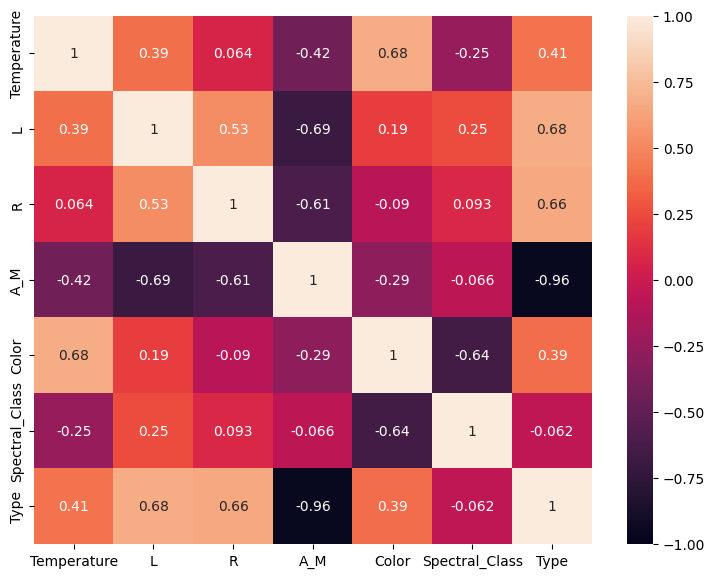

In [14]:
plt.figure(figsize=(9,7),dpi=100)
sns.heatmap(corr,vmin=-1,vmax=1,annot=True)
plt.show()

In [15]:
x=data.drop('Type',axis=1)
y=data['Type'].values

In [16]:
xs=scale(x)

In [17]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(xs,y,test_size=0.3,random_state=42)

In [18]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

In [20]:
print('training score : ',logreg.score(x_train,y_train)*100)
print('testing score : ',logreg.score(x_test,y_test)*100)

training score :  97.02380952380952
testing score :  97.22222222222221


In [22]:
np.unique(y)

array([0, 1, 2, 3, 4, 5])

In [21]:
from sklearn.metrics import confusion_matrix as CM
from sklearn.metrics import classification_report as CR
cm=CM(y_test,y_pred)
print(cm)

[[14  0  0  0  0  0]
 [ 0 12  0  0  0  0]
 [ 0  0 10  0  0  0]
 [ 0  1  0  8  1  0]
 [ 0  0  0  0 11  0]
 [ 0  0  0  0  0 15]]


In [24]:
cr=CR(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.92      1.00      0.96        12
           2       1.00      1.00      1.00        10
           3       1.00      0.80      0.89        10
           4       0.92      1.00      0.96        11
           5       1.00      1.00      1.00        15

    accuracy                           0.97        72
   macro avg       0.97      0.97      0.97        72
weighted avg       0.97      0.97      0.97        72



In [25]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.3,random_state=42)

In [26]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [27]:
print('training score : ',logreg.score(x_train,y_train)*100)
print('testing score : ',logreg.score(x_test,y_test)*100)

training score :  74.40476190476191
testing score :  73.61111111111111


In [28]:
cm=CM(y_test,y_pred)
print(cm)

[[13  0  1  0  0  0]
 [ 1  0 11  0  0  0]
 [ 0  0 10  0  0  0]
 [ 0  0  4  5  1  0]
 [ 0  0  0  1 10  0]
 [ 0  0  0  0  0 15]]


In [29]:
cr=CR(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.00      0.00      0.00        12
           2       0.38      1.00      0.56        10
           3       0.83      0.50      0.62        10
           4       0.91      0.91      0.91        11
           5       1.00      1.00      1.00        15

    accuracy                           0.74        72
   macro avg       0.68      0.72      0.67        72
weighted avg       0.70      0.74      0.69        72



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
df=pd.read_csv('/content/drive/MyDrive/nasa/Asteroids .csv')
df

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.300,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.300,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.400,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,3759007,3759007,23.900,0.044112,0.098637,44.111820,98.637028,0.027410,0.061290,144.723824,...,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,J2000,False
4683,3759295,3759295,28.200,0.006089,0.013616,6.089126,13.615700,0.003784,0.008460,19.977449,...,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,J2000,False
4684,3759714,3759714,22.700,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501180,...,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,J2000,False
4685,3759720,3759720,21.800,0.116026,0.259442,116.025908,259.441818,0.072095,0.161210,380.662441,...,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767,J2000,False


In [41]:
df.columns

Index(['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbiting Body',
       'Orbit ID', 'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Equinox', 'Hazardous'],
      dtype='object')

In [42]:
df=df.drop('Equinox',axis=1)
df=df.drop('Neo Reference ID',axis=1)
df=df.drop('Name',axis=1)
df=df.drop('Orbit ID',axis=1)
df=df.drop('Orbit Determination Date',axis=1)

In [43]:
df=df.drop('Close Approach Date',axis=1)
df=df.drop('Epoch Date Close Approach',axis=1)
df=df.drop('Orbiting Body',axis=1)

In [45]:
df.replace({True:1,False:0},inplace=True)

In [46]:
df

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Relative Velocity km per sec,...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,6.115834,...,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,1
1,21.300,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,18.113985,...,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,0
2,20.300,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,7.590711,...,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,1
3,27.400,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,11.173874,...,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,0
4,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,9.840831,...,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,23.900,0.044112,0.098637,44.111820,98.637028,0.027410,0.061290,144.723824,323.612307,22.154265,...,39.880491,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,0
4683,28.200,0.006089,0.013616,6.089126,13.615700,0.003784,0.008460,19.977449,44.670934,3.225150,...,5.360249,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,0
4684,22.700,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501180,562.373736,7.191642,...,4.405467,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,0
4685,21.800,0.116026,0.259442,116.025908,259.441818,0.072095,0.161210,380.662441,851.187094,11.352090,...,21.080244,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767,0


In [39]:
x=df.drop('Hazardous',axis=1)
y=df['Hazardous'].values

In [47]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.3,random_state=42)

In [48]:
logr=LogisticRegression()
logr.fit(x_train,y_train)
y_pred=logr.predict(x_test)

In [50]:
print('training score : ',logr.score(x_train,y_train)*100)
print('testing score : ',logr.score(x_test,y_test)*100)

training score :  83.04878048780488
testing score :  84.86140724946695


In [51]:
cm=CM(y_test,y_pred)
print(cm)

[[1188    6]
 [ 207    6]]


In [52]:
cr=CR(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

       False       0.85      0.99      0.92      1194
        True       0.50      0.03      0.05       213

    accuracy                           0.85      1407
   macro avg       0.68      0.51      0.49      1407
weighted avg       0.80      0.85      0.79      1407



In [53]:
xs=scale(x)
x_train,x_test,y_train,y_test=tts(xs,y,test_size=0.3,random_state=42)

In [54]:
logr=LogisticRegression()
logr.fit(x_train,y_train)
y_pred=logr.predict(x_test)

In [55]:
print('training score : ',logr.score(x_train,y_train)*100)
print('testing score : ',logr.score(x_test,y_test)*100)

training score :  95.73170731707317
testing score :  95.3091684434968


In [56]:
cm=CM(y_test,y_pred)
print(cm)

[[1164   30]
 [  36  177]]


In [57]:
cr=CR(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

       False       0.97      0.97      0.97      1194
        True       0.86      0.83      0.84       213

    accuracy                           0.95      1407
   macro avg       0.91      0.90      0.91      1407
weighted avg       0.95      0.95      0.95      1407

